# Paper Outline

* Present observations and data reduction
* size of halpha vs stellar mass
  * compare with Lizhi models
  
* size ratio vs gas properties for CO and HI galaxies



In [89]:
import numpy as np
from matplotlib import pyplot as plt
import os
homedir = os.getenv("HOME")
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
%run ~/github/Virgo/programs/readtablesv2.py

In [2]:
v.co.colnames

['VFID',
 'RAgas',
 'DECgas',
 'COreference',
 'alphaCO',
 'Mmol',
 'Mmol_err_up',
 'Mmol_err_down',
 'r21',
 'err_r21',
 'tdep',
 'tdep_err_up',
 'tdep_err_down',
 'HIreference',
 'MHI',
 'MHI_err_up',
 'MHI_err_down',
 'MH2_to_MHI',
 'MH2_to_MHI_err_up',
 'MH2_to_MHI_err_down',
 'H2def',
 'errH2def',
 'HIdef',
 'errHIdef',
 'Separation']

## Filters


In [61]:
def integrate_filter(wave,response,photon_weight=False):
    from scipy import integrate
    from astropy import constants as c
    if photon_weight:
        filter_sum = integrate.trapz(response*c.h.cgs.value*c.c.to('nm/s').value/wave, wave)
    else:
        filter_sum = integrate.trapz(response, wave)
    norm = integrate.trapz(np.ones(len(wave)),wave)
    return filter_sum/100#/norm

In [27]:
from astropy import constants as c

In [31]:
c.h.to

<<class 'astropy.constants.codata2018.CODATA2018'> name='Planck constant' value=6.62607015e-34 uncertainty=0.0 unit='J s' reference='CODATA 2018'>

KPNO Ha+4nm 78.58
WFC Ha 84.21
WFC Ha6657 71.96
KPNO R 1341.54
KPNO r 1283.47
BASS r 1042.18
WFC r 1097.07


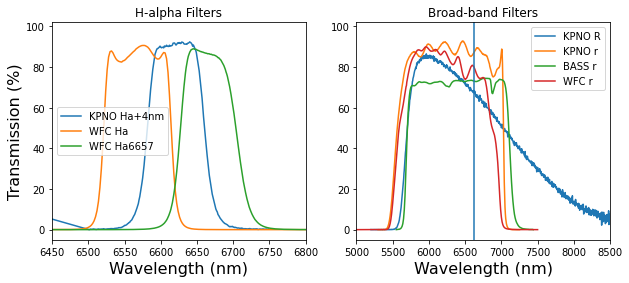

In [92]:
filter_dir = homedir+'/github/halphagui/filter_traces/'
hafilters = ['ha4-sim04.txt','wfc-int-197-halpha.txt','wfc-int-227-ha6657.txt']
halabels = [ 'KPNO Ha+4nm','WFC Ha','WFC Ha6657']
rfilters = ['kpno-harris-R-k1004.txt','kpno-sdss-r-k1018.txt','BASS-r.txt','wfc-int-sloan-r.txt'] # need BOK r
rlabels = [ 'KPNO R','KPNO r','BASS r','WFC r']
from astropy.io import ascii
plt.figure(figsize=(10,4))
xlab = "Wavelength (nm)"
ylab = "Transmission (%)"
plt.subplot(1,2,1)
# plot halpha filters

for i,f in enumerate(hafilters):
    dat = ascii.read(filter_dir+f)
    if i > 0:
        wav = dat['col1']*10
    else:
        wav = dat['col1']
    T = dat['col2']
    plt.plot(wav,T,label=halabels[i])
    print(halabels[i],f"{integrate_filter(wav,T):.2f}")
plt.xlabel(xlab,fontsize=16)
plt.ylabel(ylab,fontsize=16)
plt.title("H-alpha Filters")
plt.xlim(6450,6800)
plt.ylim(-5,102)
plt.legend()
plt.subplot(1,2,2)
# plot halpha filters
for i,f in enumerate(rfilters):
    dat = ascii.read(filter_dir+f)
 

    if i == 3:
        wav = dat['col1']*10
    else:
        try:
            wav = dat['col1']
        except KeyError:
            wav = dat['wavelength(A)']
    try:
        T = dat['col2']
    except KeyError:
        T = dat['response']*100
    plt.plot(wav,T,label=rlabels[i])
    print(rlabels[i],f"{integrate_filter(wav,T):.2f}")
plt.legend()
plt.xlabel(xlab,fontsize=16)
#plt.ylabel(ylab,fontsize=16)
plt.xlim(5000,8500)
plt.ylim(-5,102)
plt.title("Broad-band Filters")

# plot wavelength of halpha
lambda0 = 6563
vr_virgo = 2000
plt.axvline(x=6625)
plt.savefig(homedir+'/research/Virgo/plots/halpha/filter_traces.png')

In [81]:
# calculating filter ratio
# KPNO Ha+4nm to BASS r
a = 78.58/1042.18
# photon weighting
b =  2.358438067757597e-09/3.2430003311538484e-08

# normalizing by integral of dwave
c = 7.887752734975248e-11/1.7158731910866923e-10

# normalizing by integral of dwave, no photon weighting
d = 26.28095317725754/55.141873105291005

print(f"{a:.4f}, {b:.4f}, {c:.4f}, {d:.4f}")

# the observed ratio is ~ 0.06, so the first two seem closer

0.0754, 0.0727, 0.4597, 0.4766


In [84]:
# MOS Ha+4nm to R
a = 78.58/1341.54
print(f"KPNO Ha+4nm w/R: {a:.4f}")#

# HDI Ha+4nm to r
a = 78.58/1283.47
print(f"KPNO Ha+4nm w/r: {a:.4f}")#

KPNO Ha+4nm w/R: 0.0586
KPNO Ha+4nm w/r: 0.0612


In [85]:
# INT halpha vs r; observed ratio is 0.033

a = 84.21/1097.07

print(f"INT Ha w/r:{a:.4f}")#", {b:.4f}, {c:.4f}, {d:.4f}")

a = 71.96/1097.07
print(f"INT Ha6657 w/r:{a:.4f}")

INT Ha w/r:0.0768
INT Ha6657 w/r:0.0656


In [78]:
# Boselli+2002 paper

a = 83.95/1307.73

print(f"{a:.4f}")#

0.0642


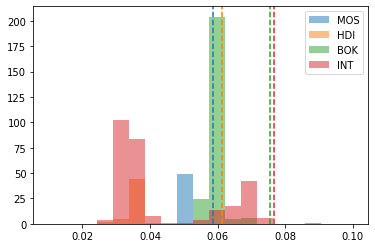

In [90]:
# observed distribution of filter ratios

calc_ratios = {'MOS':0.0586,'HDI':.0612,'BOK':.0754,'INT':0.0768}
instruments = ['MOS','HDI','BOK','INT']
mybins = np.linspace(0.01,.1,20)
for i in instruments:
    flag = v.halpha['TEL'] == i
    plt.hist(v.halpha['FILTER_RATIO'][flag],label=i,bins=mybins,alpha=.5)
plt.legend()


for i,k in enumerate(calc_ratios.keys()):
    plt.axvline(calc_ratios[k],label=k,color=mycolors[i],ls='--')
#############################################################################
# the calculation below yields the same thing, 
# so the FILTER_RATIO is from the difference in ZPs
#
# don't need to plot both
#
############################################################################

#plt.figure()
#instruments = ['MOS','HDI','BOK','INT']
#fratio = 10.**((v.halpha['HZP']-v.halpha['RZP'])/2.5)
#for i in instruments:
#    flag = v.halpha['TEL'] == i
#    plt.hist(fratio[flag],label=i,bins=mybins,alpha=.5)
#plt.legend()

## Overview of Sample



# Color - SFR

are there blue galaxies with no current SF?



# Sizes

In [4]:
v.a100.colnames

['VFID',
 'AGC',
 'Name',
 'OrigSrcName',
 'HISrcName',
 'RAdeg_HI',
 'DECdeg_HI',
 'RAdeg_OC',
 'DECdeg_OC',
 'RAdeg_Use',
 'DECdeg_Use',
 'Vhelio',
 'sigV',
 'W50',
 'sigWtot',
 'sigWstat',
 'W20',
 'HIflux',
 'sigflux',
 'SNR',
 'RMS',
 'Dist',
 'sigdist',
 'logMH',
 'siglogMH',
 'HIcode',
 'HIdef',
 'HIdef_flag',
 'HIdef_bos',
 'HIdef_jon',
 'HIdef_bytype',
 'logMstarTaylor',
 'modelMag_u',
 'modelMag_g',
 'modelMag_r',
 'modelMag_i',
 'modelMag_z',
 'modelMagErr_u',
 'modelMagErr_g',
 'modelMagErr_r',
 'modelMagErr_i',
 'modelMagErr_z',
 'cModelMag_u',
 'cModelMag_g',
 'cModelMag_r',
 'cModelMag_i',
 'cModelMag_z',
 'cModelMagErr_u',
 'cModelMagErr_g',
 'cModelMagErr_r',
 'cModelMagErr_i',
 'cModelMagErr_z',
 'petroMag_u',
 'petroMag_g',
 'petroMag_r',
 'petroMag_i',
 'petroMag_z',
 'petroMagErr_u',
 'petroMagErr_g',
 'petroMagErr_r',
 'petroMagErr_i',
 'petroMagErr_z',
 'petroRad_u',
 'petroRad_g',
 'petroRad_r',
 'petroRad_i',
 'petroRad_z',
 'petroR50_g',
 'petroR50_r',
 'petro

## Size vs CO and HI def